In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [4]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [6]:
x = data.data
y = data.target

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("r2 : ", r2)
print("rmse : ", rmse)

r2 :  0.5188113124539249
rmse :  48.72713760953252


# Lasso Regressor

In [15]:
from sklearn.linear_model import Lasso
l = Lasso(alpha=0.0001) # alpha = lambda
l.fit(x_train, y_train)
y_pred = l.predict(x_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("r2 : ", r2)
print("rmse : ", rmse)

r2 :  0.5189175390351297
rmse :  48.72175884328773


# Working with a random dataset

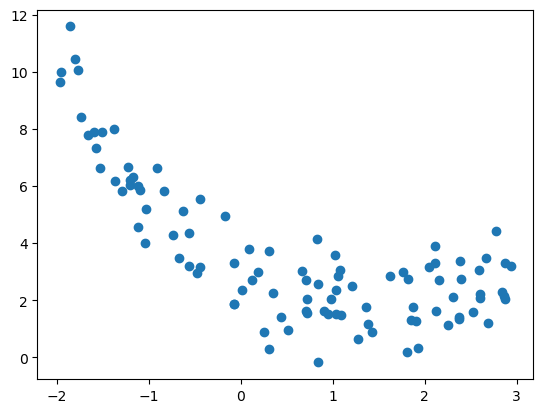

In [17]:
m = 100
# np.random.randn() in Python's NumPy library generates a mx1 array
x1 = 5*np.random.rand(m,1)-2
x2 = 0.7*x1**2 -2*x1 + 3 + np.random.randn(m, 1)
# x2 = 0.7 x^2 -2x
plt.scatter(x1, x2)
plt.show()

C:\Users\anjal\anaconda3\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\anjal\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\anjal\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.659e+01, tolerance: 6.294e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

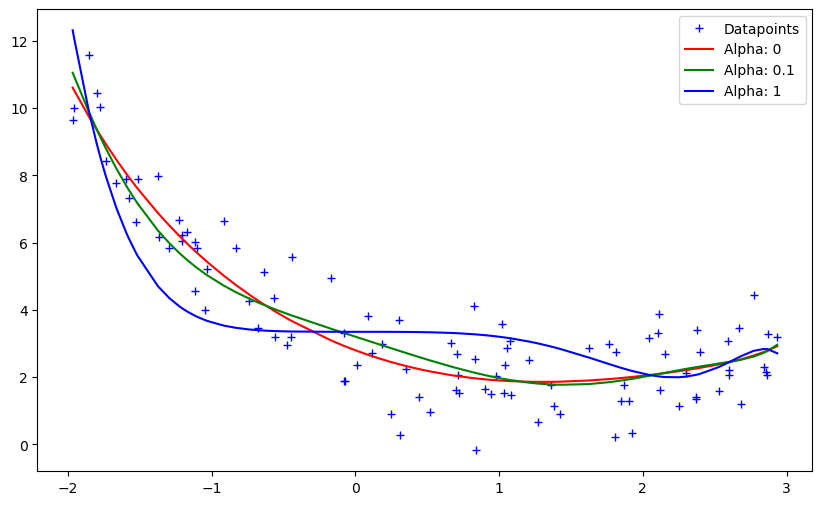

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()
